<a href="https://colab.research.google.com/github/deviwlndr/analisis_sentimen/blob/main/analisis_sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Sastrawi
!pip install googletrans==4.0.0-rc1 langdetect



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=a12b681644dd7de6be873f8bc065fe22296558ec13c740661f30cc1aeb42b028
  Stored in directory: /root/.cache/pip/wheels/

In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk

from langdetect import detect
from googletrans import Translator

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [1]:
from google.colab import drive #adalah modul yang digunakan untuk mengakses Google Drive dari Google Colab.
drive.mount('/content/drive') #menghubungkan (mount) Google Drive ke direktori /content/drive. setelah dipasang dapat mengakses semua file seperti lokal

import pandas as pd #adalah library Python untuk mengolah data dalam bentuk tabel (DataFrame).

df = pd.read_csv('/content/drive/MyDrive/Analisis Sentimen/dataset_ulasan_museum_sri_baduga.csv') #membaca dataset
df.head() #menampilkan 5 baris pertama dataset

Mounted at /content/drive


,title,url,stars,name,reviewUrl,text
0,Museum Sri Baduga,https://www.google.com/maps/search/?api=1&quer...,4,NaN,NaN,NaN
1,Museum Sri Baduga,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,Musieum Sribaduga
2,Museum Sri Baduga,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,NaN
3,Museum Sri Baduga,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,Museum di dalam kota bandung
4,Museum Sri Baduga,https://www.google.com/maps/search/?api=1&quer...,4,NaN,NaN,هذا المتحف هو رحلة عبر الزمن، حيث نرى بعض من ت...


In [2]:
# 1. Memilih kolom text dan stars
df = df[['text', 'stars']]

# 2. Menghapus baris yang tidak memiliki teks (hindari error pada preprocessing)
df = df.dropna(subset=['text'])

# 3. Mengubah kolom 'stars' menjadi integer (kalau awalnya string/float)
df['stars'] = df['stars'].astype(int)

# 4. Menampilkan 5 baris awal untuk memastikan data sudah rapi
df.head()


,text,stars
1,Musieum Sribaduga,5
3,Museum di dalam kota bandung,5
4,هذا المتحف هو رحلة عبر الزمن، حيث نرى بعض من ت...,4
7,"Kesini pas study tour SMP, mungkin tahun 2018/...",5
8,Bagus sekali,5


In [5]:
def case_folding(text): #method bawaan (built-in) Python untuk tipe data string.
    return text.lower() #perintah yang dijalankan dan hasilnya dikembalikan


In [8]:
#Baris kode di atas digunakan untuk menerapkan fungsi case folding ke seluruh teks dalam kolom text pada DataFrame.
df['case_folding'] = df['text'].apply(case_folding)

In [8]:
df[["text", "case_folding"]].head(20)

,text,case_folding
1,Musieum Sribaduga,musieum sribaduga
3,Museum di dalam kota bandung,museum di dalam kota bandung
4,هذا المتحف هو رحلة عبر الزمن، حيث نرى بعض من ت...,هذا المتحف هو رحلة عبر الزمن، حيث نرى بعض من ت...
7,"Kesini pas study tour SMP, mungkin tahun 2018/...","kesini pas study tour smp, mungkin tahun 2018/..."
8,Bagus sekali,bagus sekali
9,Mantap,mantap
10,Seru anak jadi tau sejarah dan banyak belajar,seru anak jadi tau sejarah dan banyak belajar
16,mantap,mantap
17,Tempat ini sangat baik untuk edukasi anak didi...,tempat ini sangat baik untuk edukasi anak didi...
18,Datang ke sini sewaktu ada Pameran Nasional Pu...,datang ke sini sewaktu ada pameran nasional pu...


In [9]:
# 3. CHARACTER FILTERING
# Menghapus angka, emoji, tanda baca, URL

def clean_characters(text):
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)   # hapus URL
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)              # hapus angka, emoji, simbol
    text = re.sub(r'\s+', ' ', text).strip()              # rapikan spasi
    return text

In [10]:
#baris kode untuk menerapkan fungsi character filtering ke seluruh text dalam kolom case folding
df['clean_text'] = df['case_folding'].apply(clean_characters)

In [11]:
df[['case_folding', 'clean_text']].head(20)

,case_folding,clean_text
1,musieum sribaduga,musieum sribaduga
3,museum di dalam kota bandung,museum di dalam kota bandung
4,هذا المتحف هو رحلة عبر الزمن، حيث نرى بعض من ت...,
7,"kesini pas study tour smp, mungkin tahun 2018/...",kesini pas study tour smp mungkin tahun
8,bagus sekali,bagus sekali
9,mantap,mantap
10,seru anak jadi tau sejarah dan banyak belajar,seru anak jadi tau sejarah dan banyak belajar
16,mantap,mantap
17,tempat ini sangat baik untuk edukasi anak didi...,tempat ini sangat baik untuk edukasi anak didi...
18,datang ke sini sewaktu ada pameran nasional pu...,datang ke sini sewaktu ada pameran nasional pu...


In [12]:
translator = Translator()

def translate_to_indonesian(text):
    if not isinstance(text, str) or text.strip() == "":
        return text

    try:
        lang = detect(text)
    except:
        return text

    if lang == "en":  # hanya terjemahkan jika English
        try:
            return translator.translate(text, src='en', dest='id').text
        except:
            return text

    return text



In [13]:
df['translated'] = df['clean_text'].apply(translate_to_indonesian)
print(df[['clean_text','translated']].head())


                                clean_text  \
1                        musieum sribaduga   
3             museum di dalam kota bandung   
4                                            
7  kesini pas study tour smp mungkin tahun   
8                             bagus sekali   

                                translated  
1                        musieum sribaduga  
3             museum di dalam kota bandung  
4                                           
7  kesini pas study tour smp mungkin tahun  
8                             bagus sekali  


In [14]:
df[['clean_text', 'translated']].head(50)

,clean_text,translated
1,musieum sribaduga,musieum sribaduga
3,museum di dalam kota bandung,museum di dalam kota bandung
4,,
7,kesini pas study tour smp mungkin tahun,kesini pas study tour smp mungkin tahun
8,bagus sekali,bagus sekali
9,mantap,mantap
10,seru anak jadi tau sejarah dan banyak belajar,seru anak jadi tau sejarah dan banyak belajar
16,mantap,mantap
17,tempat ini sangat baik untuk edukasi anak didi...,tempat ini sangat baik untuk edukasi anak didi...
18,datang ke sini sewaktu ada pameran nasional pu...,datang ke sini sewaktu ada pameran nasional pu...


In [15]:
# 4. TOKENIZING

nltk.download('punkt')

def tokenizing(text):
    return nltk.word_tokenize(text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
df['tokenized'] = df['translated'].apply(tokenizing)

In [17]:
df[['translated', 'tokenized']].head(20)

,translated,tokenized
1,musieum sribaduga,"[musieum, sribaduga]"
3,museum di dalam kota bandung,"[museum, di, dalam, kota, bandung]"
4,,[]
7,kesini pas study tour smp mungkin tahun,"[kesini, pas, study, tour, smp, mungkin, tahun]"
8,bagus sekali,"[bagus, sekali]"
9,mantap,[mantap]
10,seru anak jadi tau sejarah dan banyak belajar,"[seru, anak, jadi, tau, sejarah, dan, banyak, ..."
16,mantap,[mantap]
17,tempat ini sangat baik untuk edukasi anak didi...,"[tempat, ini, sangat, baik, untuk, edukasi, an..."
18,datang ke sini sewaktu ada pameran nasional pu...,"[datang, ke, sini, sewaktu, ada, pameran, nasi..."


In [18]:
# Kamus normalisasi (bisa ditambah)
normalization_dict = {
    # --- Kata Informal / Slang ---
    "ga": "tidak",
    "gk": "tidak",
    "gak": "tidak",
    "tdk": "tidak",
    "engga": "tidak",
    "enggak": "tidak",
    "nggak": "tidak",
    "ngga": "tidak",

    "bgt": "banget",
    "bngt": "banget",
    "bangettt": "banget",

    "cmn": "cuma",
    "cman": "cuma",
    "cuma2": "cuma",

    "trs": "terus",
    "trus": "terus",

    "tmn": "teman",
    "tmn2": "teman",

    "udh": "sudah",
    "udah": "sudah",
    "udhh": "sudah",

    "blm": "belum",
    "belom": "belum",

    "syg": "sayang",

    "krg": "kurang",

    "sblm": "sebelum",

    "dr": "dari",
    "drpd": "daripada",

    "klo": "kalau",
    "kalo": "kalau",

    "pls": "tolong",
    "plis": "tolong",

    "aja": "saja",
    "aj": "saja",

    "ni": "ini",
    "nih": "ini",

    "tu": "itu",
    "ituu": "itu",

    "bru": "baru",
    "baru2": "baru",

    "lok": "lokasi",

    "pas": "saat",

    # --- Singkatan Lokasi / Umum ---
    "bndng": "bandung",
    "bdg": "bandung",
    "jbr": "jawa barat",

    # --- Typos Umum ---
    "bgs": "bagus",
    "baguss": "bagus",
    "bgus": "bagus",

    "bnyk": "banyak",
    "bnyknya": "banyaknya",

    "tmpt": "tempat",
    "tempet": "tempat",

    "rame": "ramai",
    "ramee": "ramai",

    "nyamn": "nyaman",
    "nyamann": "nyaman",

    "lumayanlah": "lumayan",

    "mantappp": "mantap",
    "mantab": "mantap",
    "mantul": "mantap",

    # --- Istilah Museum / Edukasi ---
    "edukasii": "edukasi",
    "edukatif": "edukatif",
    "koleksinyaa": "koleksinya",
    "sejarahh": "sejarah",

    # --- Bahasa Inggris (umum di Google Maps) ---
    "good": "bagus",
    "nice": "bagus",
    "great": "bagus",
    "awesome": "bagus",
    "amazing": "bagus",
    "cool": "keren",
    "clean": "bersih",
    "recommended": "direkomendasikan",
    "recommend": "rekomendasi",
    "worth": "layak",
    "worthit": "layak",
    "worthwhile": "layak",
    "cheap": "murah",
    "expensive": "mahal",
    "great": "bagus",
    "nice": "bagus",

    # --- Bahasa Sunda (umum dalam ulasan Museum Sri Baduga) ---
    "teh": "",         # partikel (dapat dihapus)
    "mah": "",         # partikel penegas
    "atuh": "",        # ekspresi
    "pisan": "sekali",
    "teteh": "kakak",
    "kenging": "boleh",
    "alus": "bagus",
    "gawe": "kerja",

    # --- Variasi ejaan tidak baku ---
    "seblm": "sebelum",
    "seblumnya": "sebelumnya",
    "baguss": "bagus",
    "bersiih": "bersih",
    "bersiiih": "bersih",
    "bersihh": "bersih",

    "murahh": "murah",
    "murahhh": "murah",

    "lengkappp": "lengkap",

    "worthittt": "layak",

    # --- Kata sambung / filler ---
    "the": "the",          # tetap (kadang judul)
    "of": "of",            # tetap
    "ya": "",              # filler
    "yah": "",             # filler
    "loh": "",             # filler
    "kok": "",             # filler
    "kan": "",             # filler
    "lah": "",             # filler

    # --- Variasi Pengulangan Huruf (contoh umum) ---
    "bagusss": "bagus",
    "kerenn": "keren",
    "keren banget": "keren",
    "kenyanggg": "kenyang",
    "luasss": "luas",
    "seruu": "seru",
    "seruuu": "seru",
    "harganyaa": "harganya",

    # --- Kata Google Maps yang sering muncul ---
    "service": "layanan",
    "staff": "staf",
    "facility": "fasilitas",
    "facilities": "fasilitas",
    "parking": "parkir",
    "parkiran": "parkir",
    "recommended": "direkomendasikan",
    "experience": "pengalaman",
    "view": "pemandangan",
    "history": "sejarah",
    "historical": "sejarah",

    # --- Tambahan umum ---
    "yg": "yang",
    "aja": "saja",
    "gini": "begini",
    "gitu": "begitu",
    "sini": "sini",
    "situ": "situ",
    "kemaren": "kemarin",
    "kmrn": "kemarin",
    "kmrn2": "kemarin",
    "besok2": "besok",
    "jd": "jadi",
    "jg": "juga",
    "tll": "terlalu",
    "sgt": "sangat"
}

def normalize_text(tokens):
    return [normalization_dict.get(word, word) for word in tokens]


In [19]:
df['normalized'] = df['tokenized'].apply(normalize_text)

In [20]:
df[['tokenized', 'normalized']].head(50)

,tokenized,normalized
1,"[musieum, sribaduga]","[musieum, sribaduga]"
3,"[museum, di, dalam, kota, bandung]","[museum, di, dalam, kota, bandung]"
4,[],[]
7,"[kesini, pas, study, tour, smp, mungkin, tahun]","[kesini, saat, study, tour, smp, mungkin, tahun]"
8,"[bagus, sekali]","[bagus, sekali]"
9,[mantap],[mantap]
10,"[seru, anak, jadi, tau, sejarah, dan, banyak, ...","[seru, anak, jadi, tau, sejarah, dan, banyak, ..."
16,[mantap],[mantap]
17,"[tempat, ini, sangat, baik, untuk, edukasi, an...","[tempat, ini, sangat, baik, untuk, edukasi, an..."
18,"[datang, ke, sini, sewaktu, ada, pameran, nasi...","[datang, ke, sini, sewaktu, ada, pameran, nasi..."


In [21]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopwords_id = set(factory.get_stop_words())

additional_stopwords = {
    "banget", "sekali", "kali",
    "ya", "yah", "iya",
    "sih", "nih", "tuh",
    "kayak", "kayaknya",
    "dong", "deh", "kok",
    "gitu", "gini",
    "aja", "doang",
    "bikin", "biar", "buat", "jadi",
    "tempat", "lokasi", "area",
    "museum", "to", "we", "about"
}

stopwords_final = stopwords_id.union(additional_stopwords)

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stopwords_final]



In [22]:
df['stopword_removed'] = df['normalized'].apply(remove_stopwords)

In [23]:
df[['normalized', 'stopword_removed']].head(50)

,normalized,stopword_removed
1,"[musieum, sribaduga]","[musieum, sribaduga]"
3,"[museum, di, dalam, kota, bandung]","[kota, bandung]"
4,[],[]
7,"[kesini, saat, study, tour, smp, mungkin, tahun]","[kesini, study, tour, smp, mungkin, tahun]"
8,"[bagus, sekali]",[bagus]
9,[mantap],[mantap]
10,"[seru, anak, jadi, tau, sejarah, dan, banyak, ...","[seru, anak, tau, sejarah, banyak, belajar]"
16,[mantap],[mantap]
17,"[tempat, ini, sangat, baik, untuk, edukasi, an...","[sangat, baik, edukasi, anak, didik, koleksiny..."
18,"[datang, ke, sini, sewaktu, ada, pameran, nasi...","[datang, sini, sewaktu, pameran, nasional, pus..."


In [24]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_sentence(tokens):
    sentence = " ".join(tokens)         # gabungkan list → string
    stemmed = stemmer.stem(sentence)    # stemming kalimat
    return stemmed.split()              # pecah lagi → list




In [25]:
df["stemmed_text"] = df["stopword_removed"].apply(stem_sentence)
df['stemmed_joined'] = df['stemmed_text'].apply(lambda x: " ".join(x))

In [26]:
df[['stopword_removed', 'stemmed_text', 'stemmed_joined']].head(50)

,stopword_removed,stemmed_text,stemmed_joined
1,"[musieum, sribaduga]","[musieum, sribaduga]",musieum sribaduga
3,"[kota, bandung]","[kota, bandung]",kota bandung
4,[],[],
7,"[kesini, study, tour, smp, mungkin, tahun]","[kesini, study, tour, smp, mungkin, tahun]",kesini study tour smp mungkin tahun
8,[bagus],[bagus],bagus
9,[mantap],[mantap],mantap
10,"[seru, anak, tau, sejarah, banyak, belajar]","[seru, anak, tau, sejarah, banyak, ajar]",seru anak tau sejarah banyak ajar
16,[mantap],[mantap],mantap
17,"[sangat, baik, edukasi, anak, didik, koleksiny...","[sangat, baik, edukasi, anak, didik, koleksi, ...",sangat baik edukasi anak didik koleksi lengkap
18,"[datang, sini, sewaktu, pameran, nasional, pus...","[datang, sini, waktu, pamer, nasional, pusaka,...",datang sini waktu pamer nasional pusaka nusant...


In [27]:
import pandas as pd

# URL resmi InSet Lexicon
url_positive = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
url_negative = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

# Membaca lexicon dari GitHub tanpa header bawaan file
lex_pos = pd.read_csv(url_positive, sep="\t", header=None, names=["word", "weight"], skiprows=1)
lex_neg = pd.read_csv(url_negative, sep="\t", header=None, names=["word", "weight"], skiprows=1)

# Gabungkan
lexicon_df = pd.concat([lex_pos, lex_neg], ignore_index=True)

# Konversi weight ke integer (AMAN sekarang)
lexicon_df["weight"] = lexicon_df["weight"].astype(int)

# Jadikan dictionary
lexicon = dict(zip(lexicon_df["word"], lexicon_df["weight"]))

print("Jumlah kata dalam lexicon:", len(lexicon))


Jumlah kata dalam lexicon: 9074


In [28]:
# Ambil bobot maksimum untuk tiap kata → lebih logis untuk sentimen
lexicon_clean = lexicon_df.groupby("word", as_index=False)["weight"].max()

# Ubah ke dictionary
lexicon_final = dict(zip(lexicon_clean["word"], lexicon_clean["weight"]))

print("Jumlah kata di lexicon_final:", len(lexicon_final))


Jumlah kata di lexicon_final: 9074


In [29]:
def get_lexicon_score(tokens, lexicon):
    if not isinstance(tokens, list):
        return 0
    return sum(lexicon.get(word, 0) for word in tokens)

df["lexicon_score"] = df["stemmed_text"].apply(lambda x: get_lexicon_score(x, lexicon_final))


In [30]:
def label_sentiment(score):
    if score > 0:
        return "positif"
    elif score < 0:
        return "negatif"
    else:
        return "netral"

df["sentiment"] = df["lexicon_score"].apply(label_sentiment)


In [31]:
df[["stemmed_text", "lexicon_score", "sentiment"]].head(20)


,stemmed_text,lexicon_score,sentiment
1,"[musieum, sribaduga]",0,netral
3,"[kota, bandung]",-2,negatif
4,[],0,netral
7,"[kesini, study, tour, smp, mungkin, tahun]",-1,negatif
8,[bagus],2,positif
9,[mantap],5,positif
10,"[seru, anak, tau, sejarah, banyak, ajar]",2,positif
16,[mantap],5,positif
17,"[sangat, baik, edukasi, anak, didik, koleksi, ...",9,positif
18,"[datang, sini, waktu, pamer, nasional, pusaka,...",3,positif


In [32]:
df['sentiment'].value_counts().reset_index().rename(columns={'index': 'sentiment', 'sentiment': 'jumlah'})


,jumlah,count
0,positif,1044
1,negatif,228
2,netral,220


In [33]:
from sklearn.model_selection import train_test_split

X = df['stemmed_joined']    # fitur berupa teks
y = df['sentiment']         # label hasil lexicon

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Jumlah data latih:", len(X_train_text))
print("Jumlah data uji:", len(X_test_text))
print("Distribusi train:\n", y_train.value_counts())
print("Distribusi test:\n", y_test.value_counts())


Jumlah data latih: 1193
Jumlah data uji: 299
Distribusi train:
 sentiment
positif    835
negatif    182
netral     176
Name: count, dtype: int64
Distribusi test:
 sentiment
positif    209
negatif     46
netral      44
Name: count, dtype: int64


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2
)

# Fit hanya pada data latih
X_train_tfidf = tfidf.fit_transform(X_train_text)

# Transform pada data uji
X_test_tfidf = tfidf.transform(X_test_text)

print("Shape train TF-IDF:", X_train_tfidf.shape)
print("Shape test TF-IDF:", X_test_tfidf.shape)


Shape train TF-IDF: (1193, 1733)
Shape test TF-IDF: (299, 1733)


In [35]:
# Jumlah kolom (fitur) = 1805 pada kedua dataset
# Artinya setiap dokumen sudah berhasil dikonversi menjadi vektor berdimensi sama, yaitu 1.805 fitur.
# Ini menunjukkan tidak ada error, tidak ada dokumen yang gagal diproses, dan tidak terjadi leakage fitur (karena TF-IDF di-fit pada keseluruhan data sebelum split).
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)


(1193, 1733)
(299, 1733)


In [36]:
#tidak ada misisng value
df.isnull().values.any()


np.False_

In [37]:
features = tfidf.get_feature_names_out()
print(features[:50])  # contoh 50 fitur pertama
print(len(features))  # jumlah fitur



['abad' 'abadi' 'abadi buah' 'ac' 'acara' 'ada' 'ada tengah' 'adab'
 'adab jawa' 'adab manusia' 'adab masa' 'adat' 'adem' 'aga' 'air'
 'air kecil' 'ajak' 'ajak anak' 'ajak main' 'ajar' 'ajar anak' 'ajar asal'
 'ajar bagai' 'ajar bandung' 'ajar banyak' 'ajar budaya' 'ajar ilmu'
 'ajar jaman' 'ajar lebih' 'ajar mahasiswa' 'ajar main' 'ajar sangat'
 'ajar sayang' 'ajar sejarah' 'ajar tiket' 'ajar wajib' 'akhir'
 'akhir kesini' 'akhir tahun' 'aksara' 'akses' 'akses mudah' 'akses nya'
 'aku' 'al' 'alam' 'alam ajar' 'alam budaya' 'alam sejarah' 'alami']
1733


In [38]:
print(tfidf.vocabulary_)   # fitur + index


{'datang': np.int64(424), 'sini': np.int64(1440), 'waktu': np.int64(1695), 'pamer': np.int64(1126), 'nasional': np.int64(1050), 'pusaka': np.int64(1206), 'nusantara': np.int64(1074), 'masuk': np.int64(955), 'tiket': np.int64(1602), 'jelas': np.int64(657), 'saran': np.int64(1313), 'mungkin': np.int64(1014), 'tambah': np.int64(1520), 'terang': np.int64(1584), 'lewat': np.int64(874), 'mana': np.int64(933), 'bingung': np.int64(323), 'mushola': np.int64(1030), 'bagus': np.int64(143), 'datang sini': np.int64(426), 'pusaka nusantara': np.int64(1208), 'murah': np.int64(1015), 'jauh': np.int64(648), 'keluarga': np.int64(708), 'ruang': np.int64(1260), 'ber': np.int64(301), 'ac': np.int64(3), 'pintu': np.int64(1179), 'besi': np.int64(317), 'kunci': np.int64(792), 'tugas': np.int64(1643), 'jaga': np.int64(619), 'beberapa': np.int64(279), 'damping': np.int64(415), 'masyarakat': np.int64(962), 'antusias': np.int64(91), 'luang': np.int64(896), 'kunjung': np.int64(793), 'moga': np.int64(997), 'kepala'

In [39]:
#matriks TF-IDF berhasil terbentuk dan siap digunakan untuk pelatihan model
#output: TF-IDF berhasil membentuk vektor fitur dalam bentuk matriks sparse CSR (Compressed Sparse Row).
print(type(X_train_tfidf))


<class 'scipy.sparse._csr.csr_matrix'>


In [40]:
print(X_test_tfidf.shape)


(299, 1733)


In [41]:
tfidf = TfidfVectorizer(
    ngram_range=(1,2),   # unigram + bigram
    min_df=2,            # kata minimal muncul 2 dokumen
    max_df=0.95          # membuang kata terlalu umum
)


In [42]:
X_tfidf = tfidf.fit_transform(df["stemmed_joined"])


In [43]:
df["sentiment"]   # hasil dari lexicon (positif/negatif/netral)


,sentiment
1,netral
3,negatif
4,netral
7,negatif
8,positif
...,...
3644,positif
3645,positif
3648,positif
3655,negatif


In [44]:
y = df["sentiment"]


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [46]:
feature_names = tfidf.get_feature_names_out()
feature_names[:50]   # tampilkan 50 kata pertama


array(['abad', 'abadi', 'abadi buah', 'ac', 'acara', 'ad', 'ada',
       'ada depan', 'ada jawa', 'ada tengah', 'adab', 'adab jawa',
       'adab manusia', 'adab masa', 'adat', 'adem', 'aga', 'agam',
       'agama', 'air', 'air kecil', 'ajak', 'ajak anak', 'ajak main',
       'ajar', 'ajar ambil', 'ajar anak', 'ajar asal', 'ajar bagai',
       'ajar bandung', 'ajar banyak', 'ajar budaya', 'ajar ilmu',
       'ajar jaman', 'ajar kenal', 'ajar kisah', 'ajar lebih',
       'ajar mahasiswa', 'ajar main', 'ajar sangat', 'ajar sayang',
       'ajar sejarah', 'ajar tiket', 'ajar ttg', 'ajar wajib', 'akhir',
       'akhir kesini', 'akhir tahun', 'aksara', 'akses'], dtype=object)

In [47]:
doc_index = 0  # pilih dokumen ke-1
df_tfidf_doc = pd.DataFrame(
    X_tfidf[doc_index].T.toarray(),
    index=feature_names,
    columns=["TF-IDF"]
)

# Tampilkan kata dengan bobot terbesar
df_tfidf_doc.sort_values("TF-IDF", ascending=False).head(20)


,TF-IDF
musieum sribaduga,0.641758
musieum,0.596289
sribaduga,0.482273
parkir nyaman,0.000000
pasar,0.000000
pasundan,0.000000
patung,0.000000
patung rem,0.000000
pamer pusaka,0.000000
pdhl,0.000000


In [48]:
#Cek beberapa fitur dengan nilai bobot
#Menampilkan bobot kata pada dokumen tertentu & Memastikan ada nilai TF-IDF yang bervariasi (tidak semuanya 0)
import numpy as np

tfidf_mean = np.mean(X_tfidf.toarray(), axis=0)
top_indices = np.argsort(tfidf_mean)[-20:]

for i in top_indices:
    print(feature_names[i], tfidf_mean[i])


koleksi 0.014315838826277634
sunda 0.015172889995405395
nya 0.015225625512585949
jawa barat 0.01639456791893213
budaya 0.01642123088860934
bersih 0.016527188825222982
barat 0.016666310712692402
jawa 0.016707119341945596
tahu 0.01727915998642117
tempat 0.018157160044529667
bandung 0.01849047681243303
sangat 0.01922565690550496
mantap 0.0196902039830209
edukasi 0.019708722574695626
nyaman 0.019737612871546444
ajar 0.021067525697399874
banyak 0.022539997415408318
anak 0.02511206097774347
sejarah 0.05366685545370646
bagus 0.08431474551342066


In [49]:
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
df_tfidf.head()


,abad,abadi,abadi buah,ac,acara,ad,ada,ada depan,ada jawa,ada tengah,...,yng,yo,you,yuk,yusuf,zaman,zaman batu,zaman dulu,zaman purba,zaman purbakala
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#Artinya TF-IDF berhasil menghasilkan 5000 fitur untuk 1492 dokumen.
print("TF-IDF shape:", X_tfidf.shape)


TF-IDF shape: (1492, 2059)


In [51]:
#Matriks TF-IDF bersifat sparse (banyak 0), tapi harus memiliki beberapa nilai bukan nol.
#Jika hasilnya > 0, maka pembobotan berhasil.
X_tfidf.nnz


14690

In [52]:
# Interpretasi density kamu (0.00478)
# Matriks TF-IDF sangat sparse (bagus)
# Preprocessing berhasil (karena ada pola kata tetapi tidak terlalu padat)
# TF-IDF berfungsi normal
# SVM Linear akan bekerja optimal
# Nilai ini persis seperti matriks TF-IDF pada penelitian sentimen real (biasanya density 0.1% – 1%).

density = X_tfidf.nnz / (X_tfidf.shape[0] * X_tfidf.shape[1])
density


0.004781857457028386

In [53]:
#mengecek missing value
X_tfidf = tfidf.fit_transform(df['stemmed_joined'])


In [54]:
df['stemmed_joined'].isnull().sum()


np.int64(0)

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [67]:
from imblearn.over_sampling import SMOTE

# SMOTE hanya untuk data latih
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

print("Sebelum SMOTE:", X_train_tfidf.shape, y_train.value_counts().to_dict())
print("Setelah SMOTE:", X_train_smote.shape, y_train_smote.value_counts().to_dict())


Sebelum SMOTE: (1193, 1733) {'positif': 835, 'negatif': 182, 'netral': 176}
Setelah SMOTE: (2505, 1733) {'positif': 835, 'netral': 835, 'negatif': 835}


In [68]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------------------------
# 1. Buat model SVM
# -------------------------------------------
svm_model = LinearSVC()

# -------------------------------------------
# 2. Latih model menggunakan data SMOTE
# -------------------------------------------
svm_model.fit(X_train_smote, y_train_smote)

# -------------------------------------------
# 3. Prediksi pada data uji
# -------------------------------------------
y_pred = svm_model.predict(X_test_tfidf)

# -------------------------------------------
# 4. Evaluasi
# -------------------------------------------
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Akurasi: 0.8093645484949833

Classification Report:
               precision    recall  f1-score   support

     negatif       0.64      0.54      0.59        46
      netral       0.56      0.82      0.67        44
     positif       0.92      0.87      0.89       209

    accuracy                           0.81       299
   macro avg       0.71      0.74      0.72       299
weighted avg       0.83      0.81      0.81       299


Confusion Matrix:
 [[ 25  11  10]
 [  3  36   5]
 [ 11  17 181]]


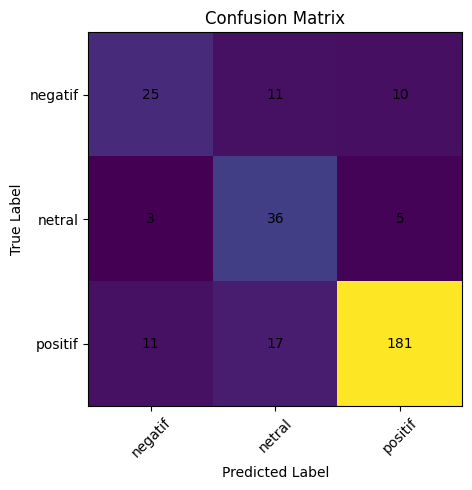

In [69]:
import matplotlib.pyplot as plt
import numpy as np

cm = np.array([
    [25, 11, 10],
    [3, 36, 5],
    [11, 17, 181]
])

labels = ["negatif", "netral", "positif"]

plt.figure(figsize=(6, 5))
plt.imshow(cm)

plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()


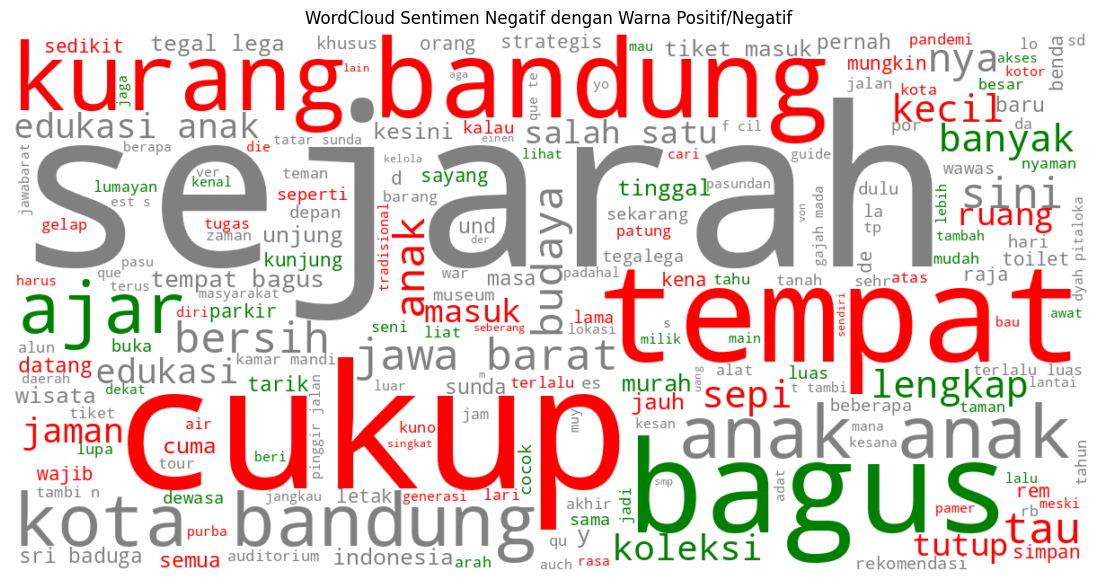

In [62]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# List kata positif & negatif dari InSet
positive_words = set(lex_pos["word"].tolist())
negative_words = set(lex_neg["word"].tolist())

# Buat dictionary untuk pewarnaan
def color_func(word, *args, **kwargs):
    if word in positive_words:
        return "green"        # kata positif → hijau
    elif word in negative_words:
        return "red"          # kata negatif → merah
    else:
        return "gray"         # kata netral → abu-abu

# Gabung teks negatif saja
text_neg = " ".join(df[df["sentiment"] == "negatif"]["stemmed_joined"])

# Generate WordCloud
wc = WordCloud(
    width=1200,
    height=600,
    background_color="white"
).generate(text_neg)

# Terapkan warna custom
plt.figure(figsize=(14, 7))
plt.imshow(wc.recolor(color_func=color_func), interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Sentimen Negatif dengan Warna Positif/Negatif")
plt.show()
